In [1]:
!pip install streamlit
!pip install networkx
!pip install tornado
!pip install --upgrade --force-reinstall --no-deps albumentations
!pip install qudida
!pip install pytesseract
!pip install pillow
!pip install torchvision
!pip install -U Pillow
!pip install --upgrade efficientnet-pytorch
!pip install torchvision
!sudo apt install tesseract-ocr
!pip install pytesseract

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached albumentations-1.2.1-py3-none-any.whl (116 kB)
  Attempting uninstall: albumentations
    Found existing installation: albumentations 1.2.1
    Uninstalling albumentations-1.2.1:
      Successfully uninstalled albumentations-1.2.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-pytho

In [2]:
# !pip install PIL

In [3]:
import numpy as np
import pytesseract
from PIL import Image
import pandas as pd
from PIL import Image

In [4]:
!pip install -U Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
!pip install torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [6]:
!pip install pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
# 
import albumentations 
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import time
from datetime import datetime
import torch
import torch.nn as nn
import torchvision
import albumentations as A
# from albumentations.pytorch import ToTensorV2
import pytesseract
from io import StringIO
from model import TableNet

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
from albumentations.pytorch.transforms import ToTensorV2
TRANSFORM = A.Compose([
                #ToTensor --> Normalize(mean, std)
                A.Normalize(
                    mean=[0.485, 0.456, 0.406],
                    std=[0.229, 0.224, 0.225],
                    max_pixel_value = 255,
                ),
                ToTensorV2()
    ])

In [13]:
model = TableNet(encoder = 'densenet', use_pretrained_model = True, basemodel_requires_grad = True)
model.eval()

#load checkpoint
model.load_state_dict(torch.load("/content/drive/MyDrive/densenet_config_4_model_checkpoint.pth (1).tar")['state_dict'])

<All keys matched successfully>

In [14]:
def predict(img_path):
    orig_image = Image.open(img_path).resize((1024, 1024))
    test_img = np.array(orig_image.convert('LA').convert("RGB"))

    now = datetime.now()
    image = TRANSFORM(image = test_img)["image"]
    with torch.no_grad():
        image = image.unsqueeze(0)
        #with torch.cuda.amp.autocast():
        table_out, _  = model(image)
        table_out = torch.sigmoid(table_out)

    #remove gradients
    table_out = (table_out.detach().numpy().squeeze(0).transpose(1,2,0) > 0.5).astype(np.uint8)

    #get contours of the mask to get number of tables
    contours, table_heirarchy = cv2.findContours(table_out, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    table_contours = []
    #ref: https://www.pyimagesearch.com/2015/02/09/removing-contours-image-using-python-opencv/
    #remove bad contours
    for c in contours:

        if cv2.contourArea(c) > 3000:
            table_contours.append(c)

    if len(table_contours) == 0:
        print("No Table detected")

    table_boundRect = [None]*len(table_contours)
    for i, c in enumerate(table_contours):
        polygon = cv2.approxPolyDP(c, 3, True)
        table_boundRect[i] = cv2.boundingRect(polygon)

    #table bounding Box
    table_boundRect.sort()

    orig_image = np.array(orig_image)
    #draw bounding boxes
    color = (0,0,255)
    thickness = 4

    for x,y,w,h in table_boundRect:
        cv2.rectangle(orig_image, (x,y),(x+w,y+h), color, thickness)
    
    plt.figure(figsize = (20,10))
    plt.imshow(orig_image)
    plt.show()
    
    end_time = datetime.now()
    difference = end_time - now
    #print("Total Time : {} seconds".format(difference))
    time = "{}".format(difference)

    print(f"Time Taken on cpu : {time} secs")

    print("Predicted Tables")

    image = test_img[...,0].reshape(1024, 1024).astype(np.uint8)

    for i,(x,y,w,h) in enumerate(table_boundRect):
        image_crop = image[y:y+h,x:x+w]
        data = pytesseract.image_to_string(image_crop)
        try:
            df = pd.read_csv(StringIO(data),sep=r'\|',lineterminator=r'\n',engine='python')
            print(f" ## Table {i+1}")
            df = pd.read_csv(StringIO(data),sep=r'\|',lineterminator=r'\n',engine='python')
            df.to_csv('output.csv')
            print(df)
        except pd.errors.ParserError:
            try:
                df = pd.read_csv(StringIO(data),delim_whitespace=True,lineterminator=r'\n',engine='python')
                print(f" ## Table {i+1}")
                df.to_csv('output.csv')
                print(df)
            except pd.errors.ParserError:
                print(f" ## Table {i+1}")
                df.to_csv('output.csv')
                print(df)

    

In [15]:
!pip install pdf2image
!pip install  poppler-utils
!pip install pytesseract
!pip install tesseract
!pip install tesseract-ocr
!pip install Pillow
!pip install pytesseract
!pip install -U Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 45.6 MB 1.9 MB/s 
  Created wheel for tesseract: filename=tesseract-0.1.3-py3-none-any.whl size=45562571 sha256=e00583092e24a47a466e50aa4eed5cc4b058a1cc2686d37941925ed403f71e92
  Stored in directory: /root/.cache/pip/wheels/01/3f/af/2f732560b9c4e51dd131bcbc6b7466a3124d15ab3fd393f85a
Successfully built tesseract
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  ERROR: Failed building wheel for tesseract-ocr
  Running setup.py clean for tesseract-ocr
Failed to build tesseract-ocr
    Running setup.py install f

In [16]:
import re
import PIL
import os
import glob
# Module Imports
import pandas as pd
import pytesseract
from glob import glob
from PIL import Image
from PIL import Image
from pdf2image import convert_from_path
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont

import ctypes
from ctypes.util import find_library
find_library("".join(("gsdll", str(ctypes.sizeof(ctypes.c_voidp) * 8), ".dll")))

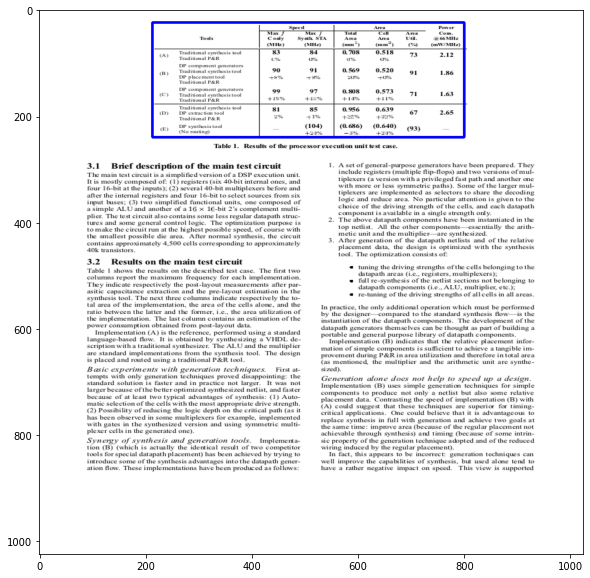

Time Taken on cpu : 0:00:36.487642 secs
Predicted Tables
 ## Table 1


UnboundLocalError: ignored

In [17]:
# pytesseract.pytesseract.tesseract_cmd = r'C://Program Files//Tesseract-OCR//tesseract.exe'
predict(img_path = '/content/10.1.1.32.3478_3.bmp')

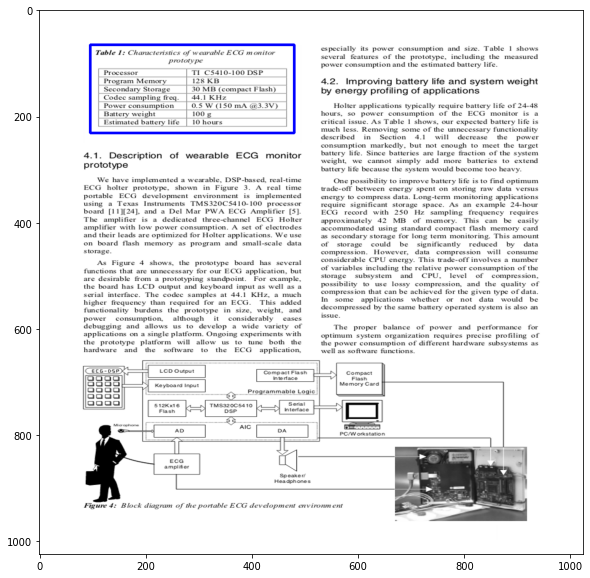

Time Taken on cpu : 0:00:34.992451 secs
Predicted Tables
 ## Table 1


UnboundLocalError: ignored

In [18]:
predict(img_path = '/content/10.1.1.33.5766_4.bmp')

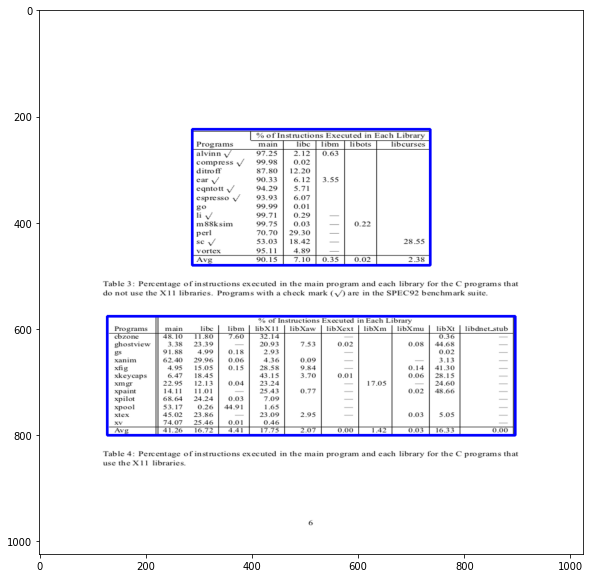

Time Taken on cpu : 0:00:32.835925 secs
Predicted Tables
 ## Table 1
                                                                                                                                                                  ‘% of Instructions Executed in Each Library,
Programs                               } main _libe                       _libm                             libX11     libXaw   libXext   libXm   libXmu   libXt                                   libdnetstub
‘cbzone 48.10 11.80 [7.60               32.14 036                         NaN                              NaN        NaN      NaN       NaN     NaN      NaN                                             None
ghostview                              NaN                                 3.38 23.39 20.93 753 0.02 0.08   44.68     NaN      NaN       NaN     NaN      NaN                                             None
gs oss 499] o1s                         293 — 0.02 —                      NaN                          

In [19]:
predict(img_path = '/content/10.1.1.34.330_10.bmp')

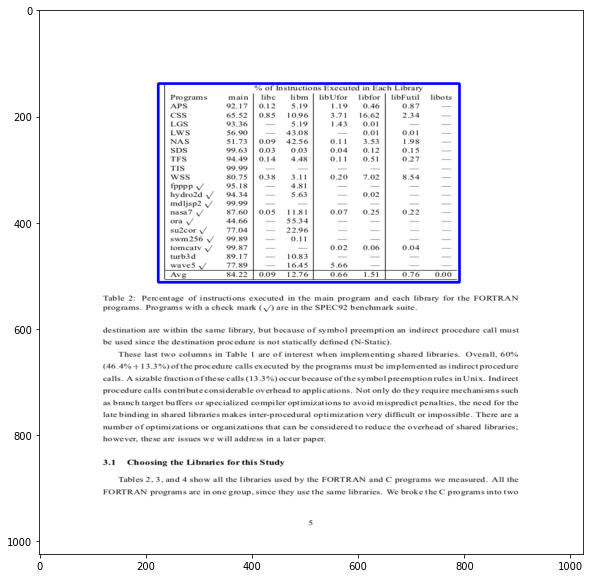

Time Taken on cpu : 0:00:33.408854 secs
Predicted Tables
 ## Table 1


UnboundLocalError: ignored

In [20]:
predict(img_path = '/content/10.1.1.34.330_9.bmp')

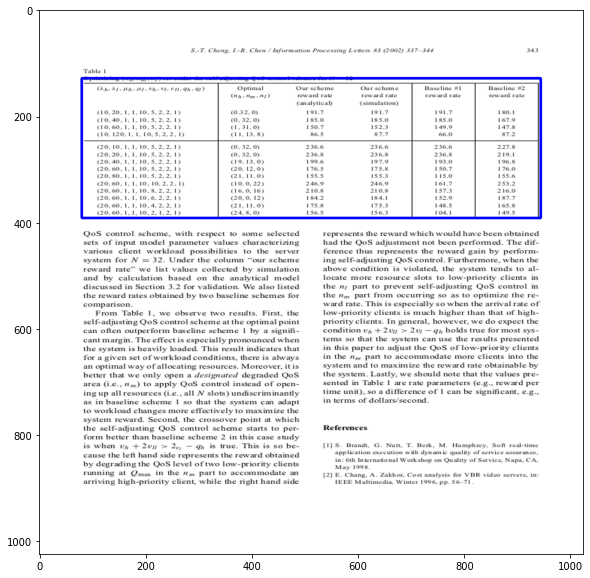

Time Taken on cpu : 0:00:33.763931 secs
Predicted Tables
 ## Table 1
                             On AE Hh AE Oh Oh Oth DD
0                                            ‘Optimal
1                                              hm MD)
2                                         ‘Our scheme
3                                         reward rate
4                                        (analyticab,
5                                         ‘Our scheme
6                                         reward rate
7                                        (simulation)
8                                         Baseline #1
9                                         reward rate
10                                        Baseline #2
11                                        reward rate
12  10,20, 1,1, 10, 5,2,2,1) (32,0) 191.7 191.7 180.1
13   10.40.11, 10,5,2,2, 1) ©.32.0) 185.0 185.0 167.9
14  (10, 60.1.1. 10,.5,2,2, 1) 31.0) 1523 149.9 147.8
15      10, 120, 1,1, 10,5,2,2, 1.13.8) 877 66.0 87.2
16  (20, 10,1

In [21]:
predict(img_path = '/content/10.1.1.8.2124_7.bmp')

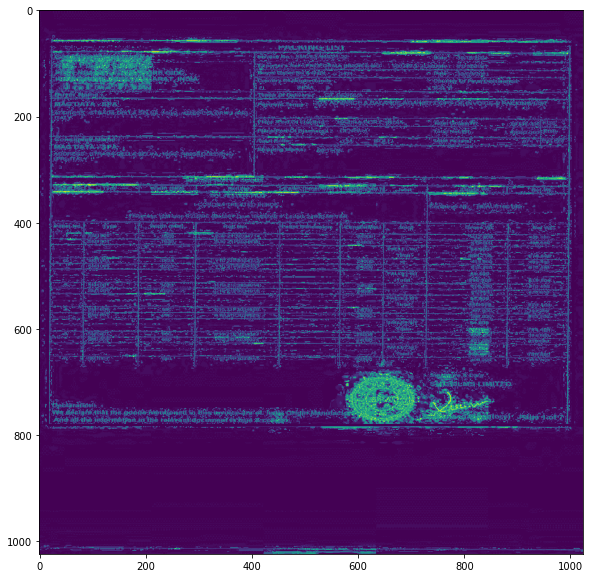

Time Taken on cpu : 0:00:32.972059 secs
Predicted Tables
 ## Table 1


UnboundLocalError: ignored

In [22]:
predict(img_path = '/content/2-2.png')

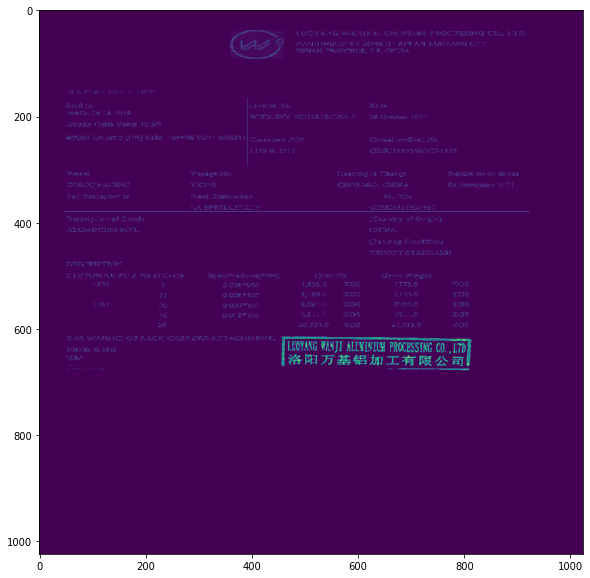

Time Taken on cpu : 0:00:33.052015 secs
Predicted Tables
 ## Table 1
                                              Sold we
0                                        MAG-DATA SPA
1                            Strada Della Selva 100/2
2                                          aveice No.
3                                 WIEX-INV-202108 16:
4                                                Date
5                                     26 Qetober 2021
6   43052 Colorno (PR) Italia Tel:+39 0521 525314]...
7                                         1129 & 1217
8                                   Vessel Voyage No.
9                                Cosco PACIFIC v.074s
10                 For Transport to Final Destination
11                                    LA SPEZIA.ITALY
12                               Deseription of Goods
13                                    ALUMINTUM FOTL,
14                                        DESCRIPTION
15                                                 cu
16           

In [23]:
predict(img_path = '/content/3-2.png')

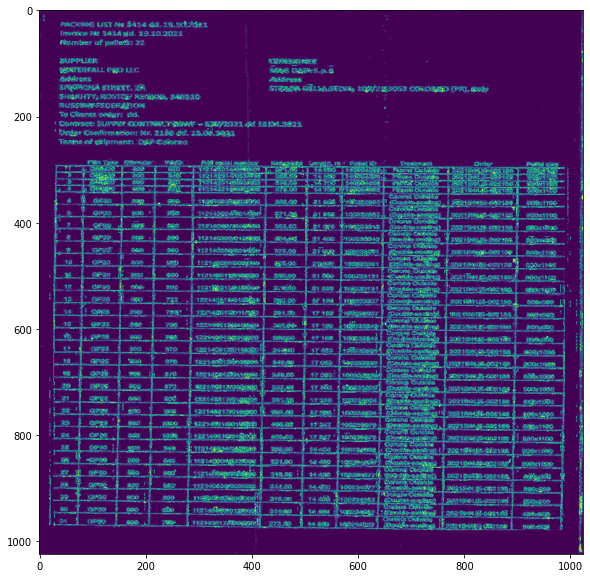

Time Taken on cpu : 0:00:32.560775 secs
Predicted Tables
 ## Table 1


UnboundLocalError: ignored

In [24]:
predict(img_path = '/content/4-04.png')

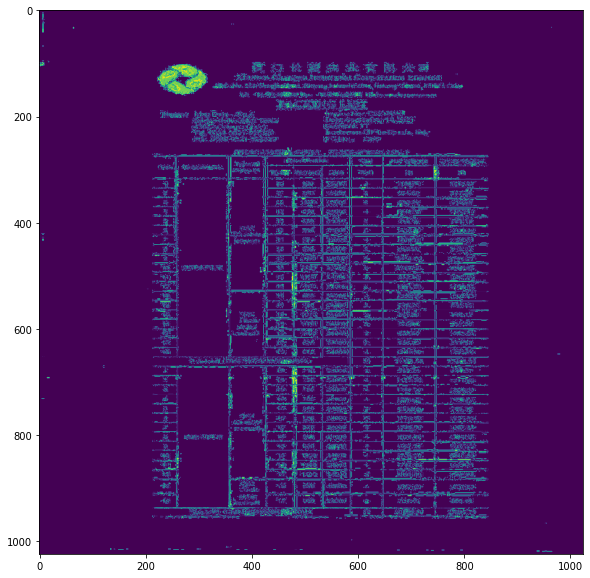

Time Taken on cpu : 0:00:33.055993 secs
Predicted Tables
 ## Table 1
                                                                                     FROM:  \
wom]     commoany              |                    2292.  Specification |             ary   
faterial |                     Tum)                 |W     (mm)|         Lom)         Roll   
1        20                    860                  e000   |             4        1195.70,   
z        20                    sao                  |      75000         2          624.80   
2.       20                    1249                 |      15000         2          850.80   
4        15                    630                  |      24000         4         1048.30   
3        ts_|                  eso                  |      2aa00         |               2   
6        |                     15                   6e0    |             24000           6   
7        45                    a0                   |      24000         4         11

In [25]:
predict(img_path = '/content/6-3.png')